In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
import random
tfk = tf.keras
tf.keras.backend.set_floatx("float64")
import tensorflow_probability as tfp
tfd = tfp.distributions
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import utils
%matplotlib inline

In [2]:
color = 'lightblue'

In [3]:
df = pd.read_csv('task.csv')

In [4]:
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,Target
0,acetone,PDMS,LiClO4,12825.6,75.7,546.3,50.6,78.8,1408.9,463.1,43.6,120.3,97.8,0.8,450.0000,0,246.086636
1,ACN,PUR,LiI,5161.7,1365.1,397.2,39.7,152.4,423.3,751.8,56.1,944.7,90.4,0.8,138.8889,1,779.498146
2,DMSO,PS,LiClO6,13297.0,221.2,528.9,37.1,209.4,2737.2,829.7,58.1,2304.2,103.1,0.9,177.7778,0,5145.489427
3,propanol,PP,LiClO4,18131.2,1550.2,875.9,34.8,976.5,316.6,519.5,46.0,158.6,180.1,0.4,100.0000,1,6.773916
4,ACN,PMMA,LiClO6,19764.5,201.7,371.8,40.5,614.0,2499.8,989.7,53.9,815.9,116.1,0.9,100.0000,0,601.290165


In [5]:
df.describe()

,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,Target
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,10753.079667,1008.978500,450.380000,42.231333,522.289833,1581.572833,642.098833,49.957167,1172.423167,116.638167,0.509833,270.268519,0.483333,1179.171172
std,5693.583199,565.175402,254.635034,10.157400,290.950452,838.421529,205.396181,5.628414,700.645508,49.024551,0.297322,108.551663,0.500139,1427.136553
min,1009.300000,52.400000,1.200000,25.000000,13.000000,100.600000,301.300000,40.000000,13.300000,30.200000,0.000000,100.000000,0.000000,4.851770
25%,5826.425000,508.300000,224.850000,33.475000,265.625000,847.775000,454.750000,45.375000,542.550000,74.275000,0.200000,177.777800,0.000000,184.083723
50%,10726.050000,989.800000,457.200000,41.800000,542.400000,1641.100000,639.500000,50.100000,1158.900000,116.050000,0.500000,255.555600,0.000000,619.636993
75%,15758.050000,1489.450000,663.425000,50.900000,769.800000,2273.250000,819.200000,54.600000,1771.000000,159.800000,0.800000,372.222200,1.000000,1790.231535
max,19994.500000,1997.900000,899.800000,60.000000,999.800000,2999.700000,994.800000,59.900000,2399.600000,199.900000,1.000000,450.000000,1.000000,11607.080760


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
Input1     600 non-null object
Input2     600 non-null object
Input3     600 non-null object
Input4     600 non-null float64
Input5     600 non-null float64
Input6     600 non-null float64
Input7     600 non-null float64
Input8     600 non-null float64
Input9     600 non-null float64
Input10    600 non-null float64
Input11    600 non-null float64
Input12    600 non-null float64
Input13    600 non-null float64
Input14    600 non-null float64
Input15    600 non-null float64
Input16    600 non-null int64
Target     600 non-null float64
dtypes: float64(13), int64(1), object(3)
memory usage: 79.8+ KB


In [7]:
df.Input1.unique()

array(['acetone', 'ACN', 'DMSO', 'propanol', 'chloroform', 'DMF', 'THF'],
      dtype=object)

In [8]:
df.Input2.unique()

array(['PDMS', 'PUR', 'PS', 'PP', 'PMMA', 'Nylon', 'PEO', 'PVC'],
      dtype=object)

In [9]:
df.Input3.unique()

array(['LiClO4', 'LiI', 'LiClO6', 'LiTFSI', 'LiCF3SO3', 'LiBF4'],
      dtype=object)

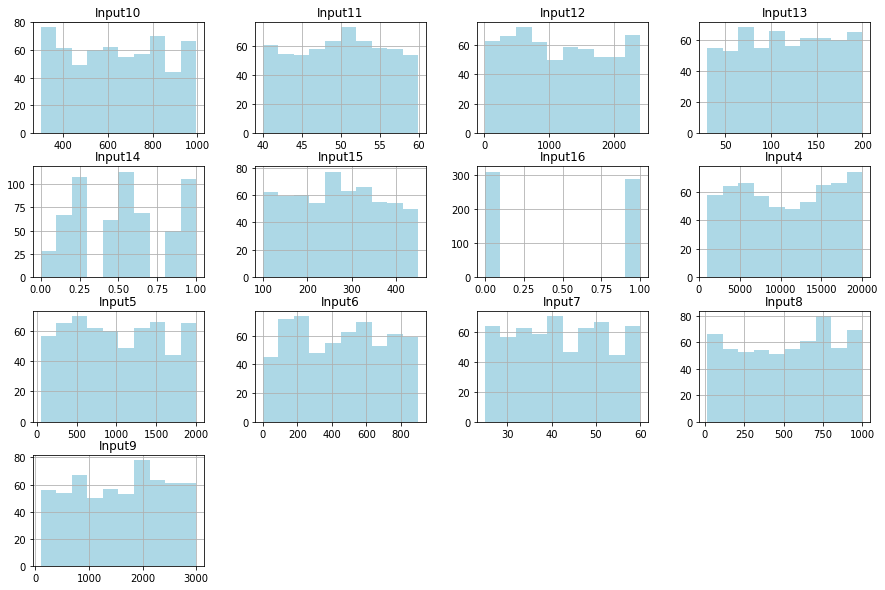

In [10]:
df.drop(["Target"], axis = 1).hist(color = 'lightblue', figsize=(15,10));

In [11]:
df.Input14.unique()

array([0.8, 0.9, 0.4, 0.1, 0. , 0.5, 0.3, 0.7, 0.2, 0.6, 1. ])

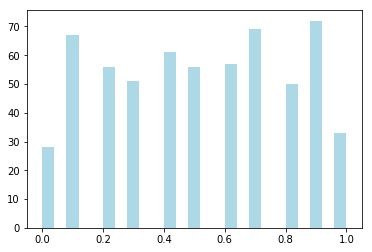

In [13]:
plt.hist(df.Input14, color = 'lightblue', bins = 25);

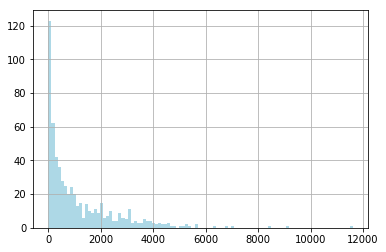

In [14]:
df.Target.hist(color = color, bins = 100);

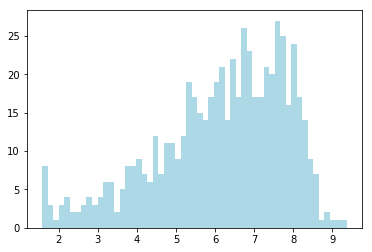

In [12]:
plt.hist(np.log(df.Target), color = color, bins = 55);

In [13]:
np.exp(np.max(np.log(df.Target)))

11607.08076

In [14]:
corr = df.corr()

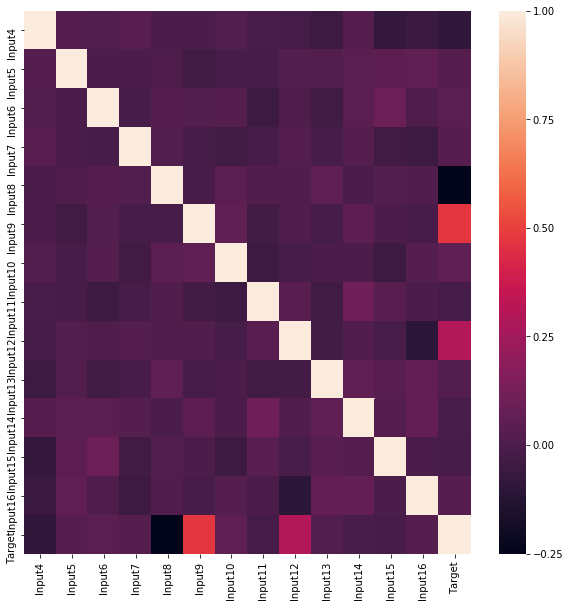

In [15]:
plt.figure(figsize = (10,10))
sn.heatmap(corr);